# Data Loading

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_diabetes
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

In [2]:
df_train = pd.read_csv("D:\Bootcamp\Project 2\Lionel Messi - All Goals for Barcelona.csv")
df_train

,Unnamed: 0,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,Year,Month
0,0,04/05,LaLiga,34,5/1/05,H,FC Barcelona,Albacete Balompie,2:0,CF,90+1,2:0,Left-footed shot,Ronaldinho Gaacho,2005,May
1,1,05/06,UEFA Champions League,Group Stage,11/2/05,H,FC Barcelona,Panathinaikos Athens,5:0,RW,34,3:0,Left-footed shot,NaN,2005,November
2,2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:1,RW,51,2:0,Left-footed shot,Samuel Etoo,2005,November
3,3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:1,RW,50,2:1,Left-footed shot,Mark van Bommel,2006,January
4,4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:0,CF,82,2:0,Left-footed shot,Ronaldinho Gaacho,2006,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,20/21,LaLiga,33,4/29/21,H,FC Barcelona,Granada CF,1:2,CF,23,1:0,Left-footed shot,Antoine Griezmann,2021,April
668,668,20/21,LaLiga,34,5/2/21,A,FC Barcelona,Valencia CF,2:3,CF,57,1:1,Left-footed shot,NaN,2021,May
669,669,20/21,LaLiga,34,5/2/21,A,FC Barcelona,Valencia CF,2:3,CF,69,1:3,Direct free kick,NaN,2021,May
670,670,20/21,LaLiga,36,5/11/21,A,FC Barcelona,Levante UD,3:3,SS,25,0:1,Left-footed shot,NaN,2021,May


# Data Cleaning & Transformation

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        672 non-null    int64 
 1   Season            672 non-null    object
 2   Competition       672 non-null    object
 3   Matchday          672 non-null    object
 4   Date              672 non-null    object
 5   Venue             672 non-null    object
 6   Club              672 non-null    object
 7   Opponent          672 non-null    object
 8   Result            672 non-null    object
 9   Playing_Position  672 non-null    object
 10  Minute            672 non-null    object
 11  At_score          672 non-null    object
 12  Type              671 non-null    object
 13  Goal_assist       466 non-null    object
 14  Year              672 non-null    int64 
 15  Month             672 non-null    object
dtypes: int64(2), object(14)
memory usage: 84.1+ KB


In [4]:
for column in df_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_train[column] = le.fit_transform(df_train[column])

In [5]:
df_train.describe(include="all")

,Unnamed: 0,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,Year,Month
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.0,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,335.500000,9.235119,2.217262,25.438988,220.958333,0.598214,0.0,43.492560,20.750000,3.980655,49.808036,11.763393,5.654762,39.872024,2013.819940,5.629464
std,194.133974,3.894444,1.034631,14.317847,125.203339,0.490624,0.0,23.868366,12.076877,1.922007,27.928273,9.109974,1.777448,21.227214,3.940922,3.594319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2005.000000,0.000000
25%,167.750000,6.000000,2.000000,13.000000,113.000000,0.000000,0.0,22.000000,10.000000,2.000000,25.000000,4.000000,5.000000,17.000000,2011.000000,3.000000
50%,335.500000,9.000000,2.000000,25.000000,225.500000,1.000000,0.0,48.500000,23.000000,5.000000,52.000000,9.000000,5.000000,46.000000,2014.000000,6.500000
75%,503.250000,12.000000,2.000000,41.000000,329.250000,1.000000,0.0,61.000000,29.000000,5.000000,75.000000,20.000000,7.000000,62.000000,2017.000000,9.000000
max,671.000000,16.000000,5.000000,45.000000,430.000000,1.000000,0.0,80.000000,45.000000,8.000000,95.000000,37.000000,12.000000,62.000000,2021.000000,11.000000


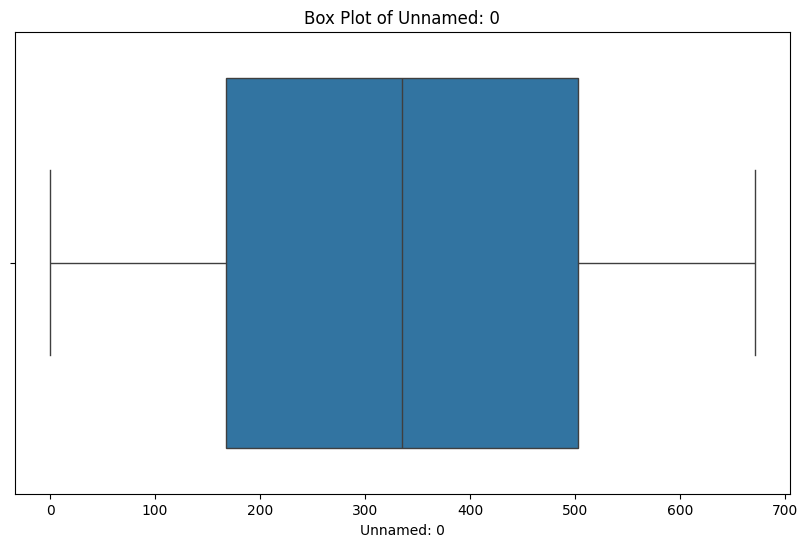

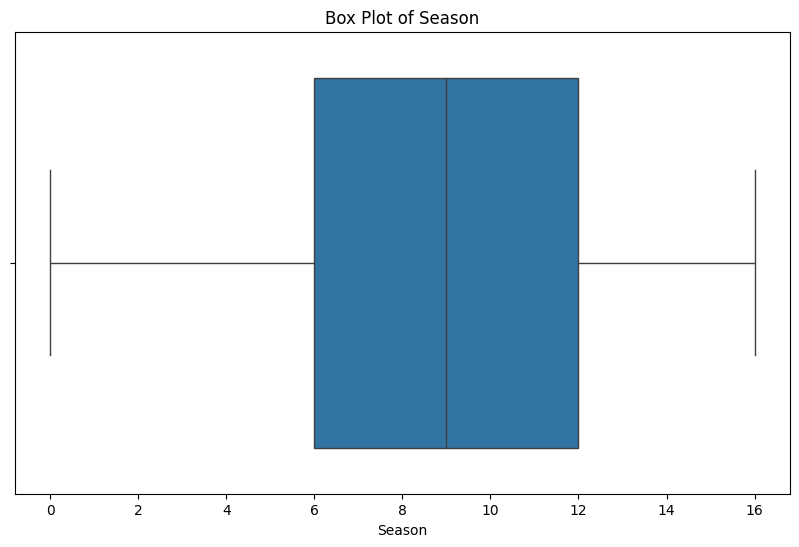

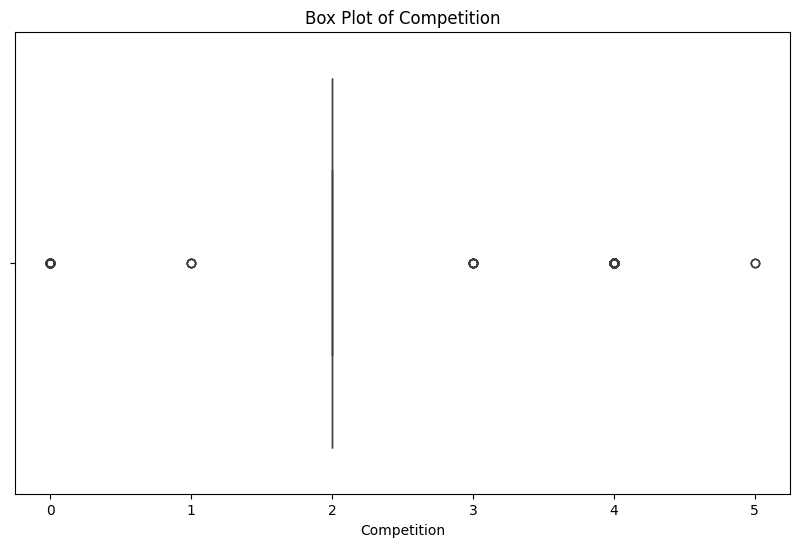

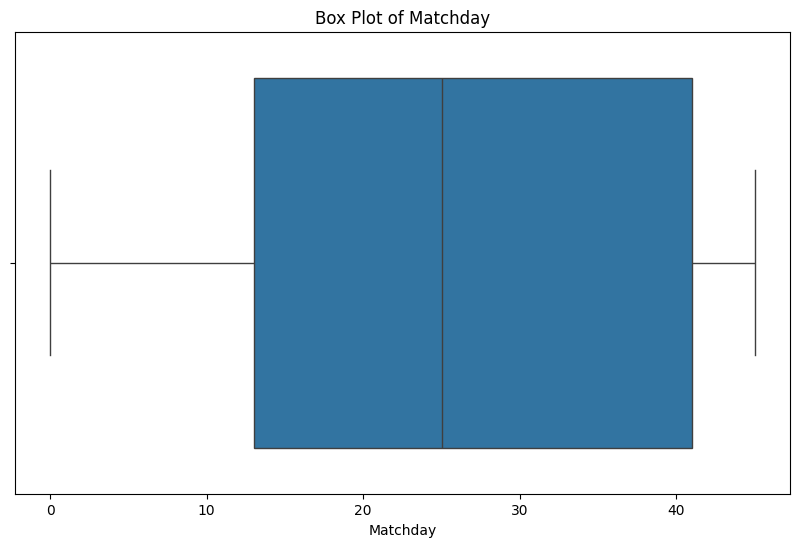

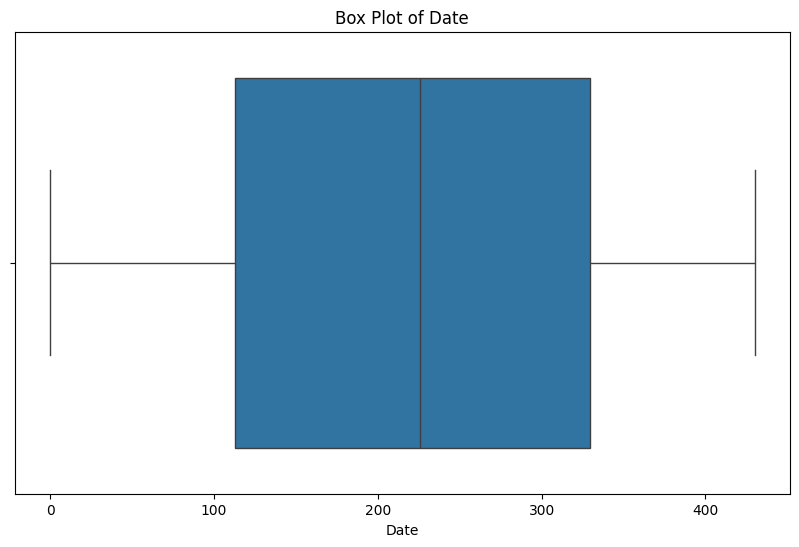

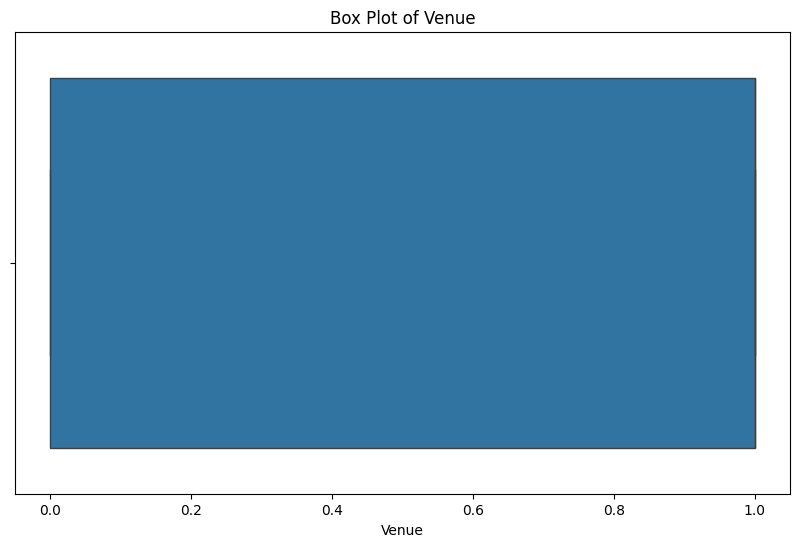

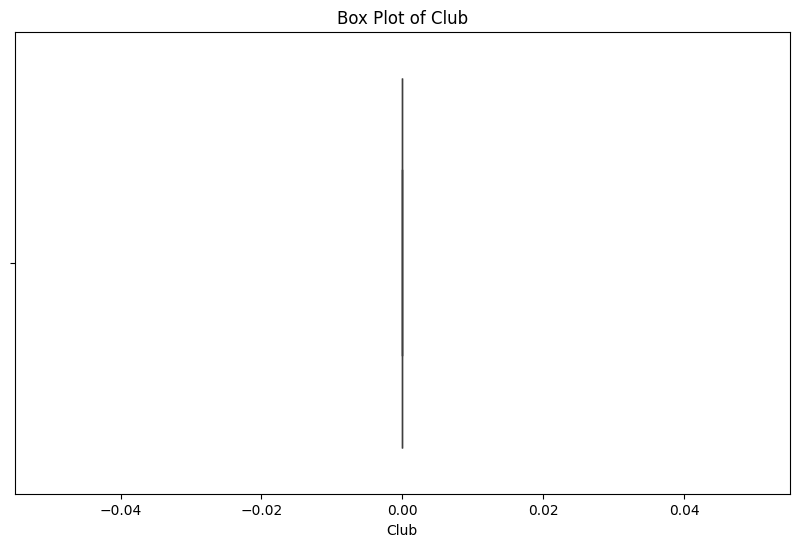

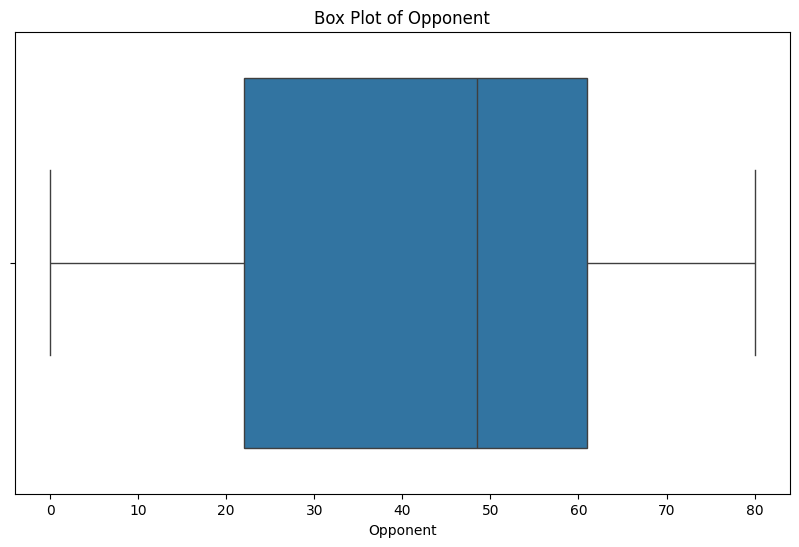

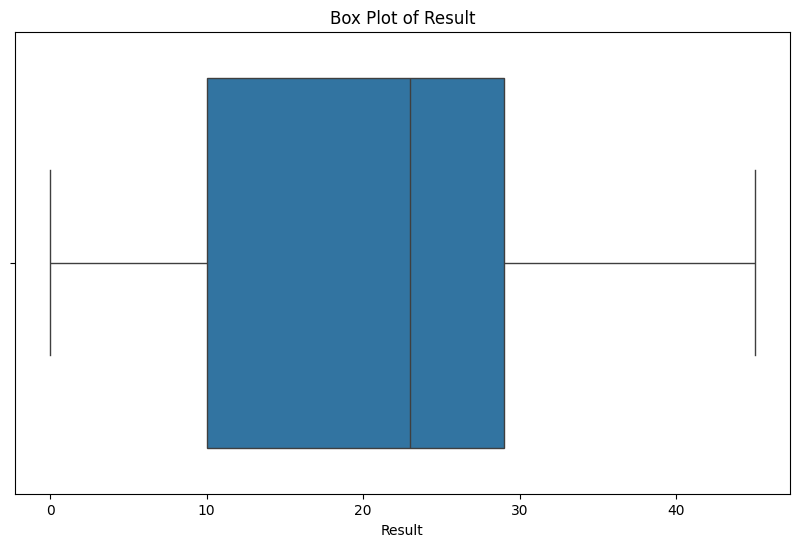

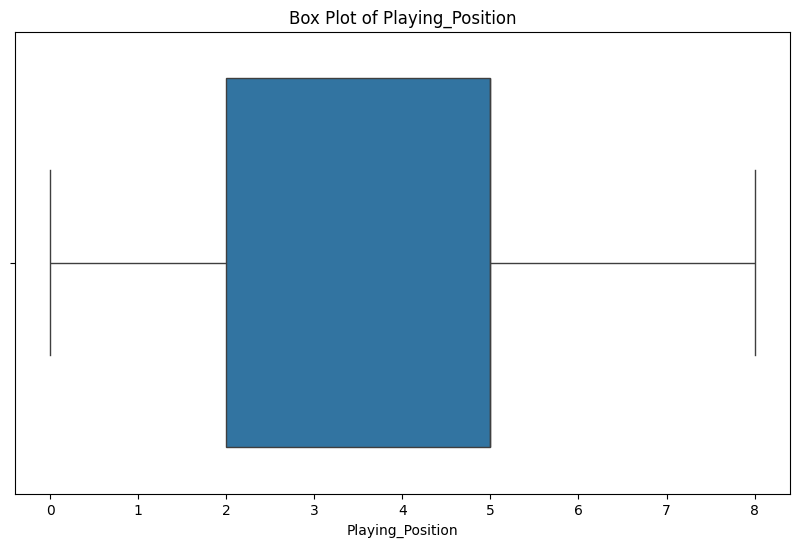

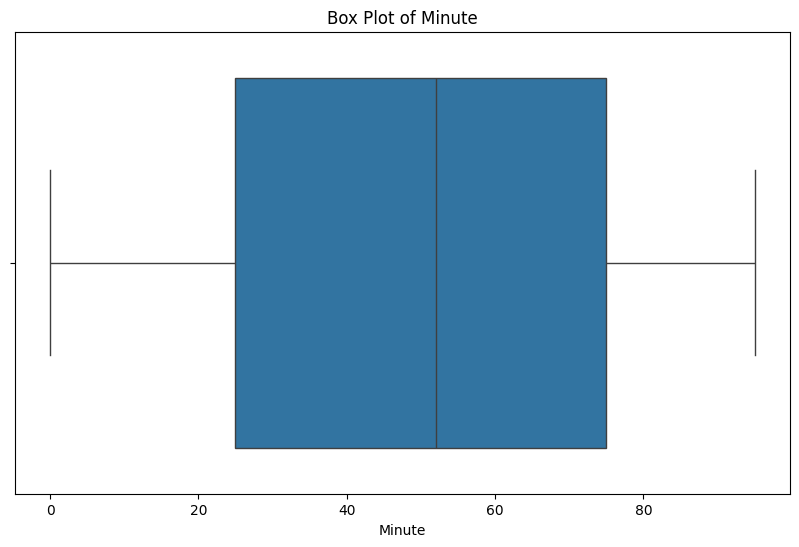

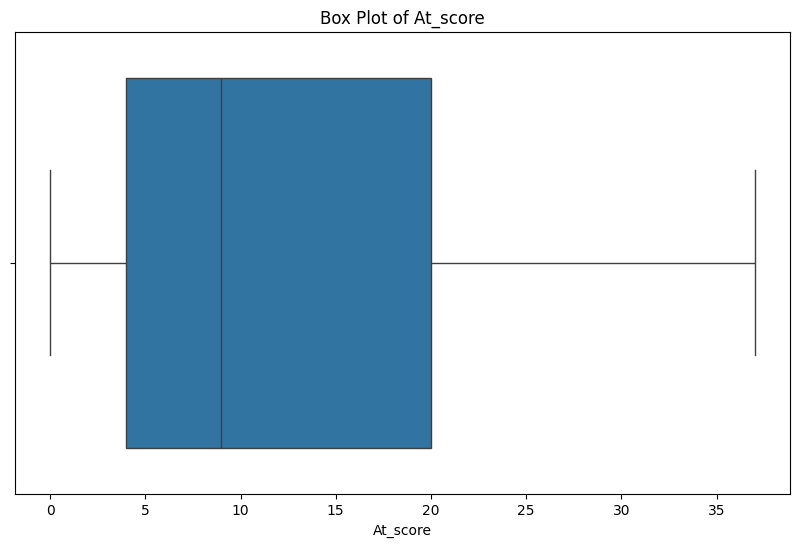

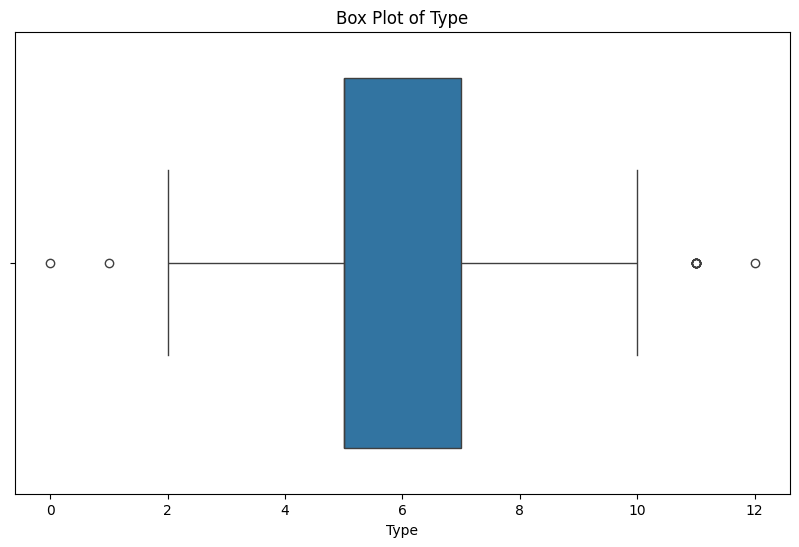

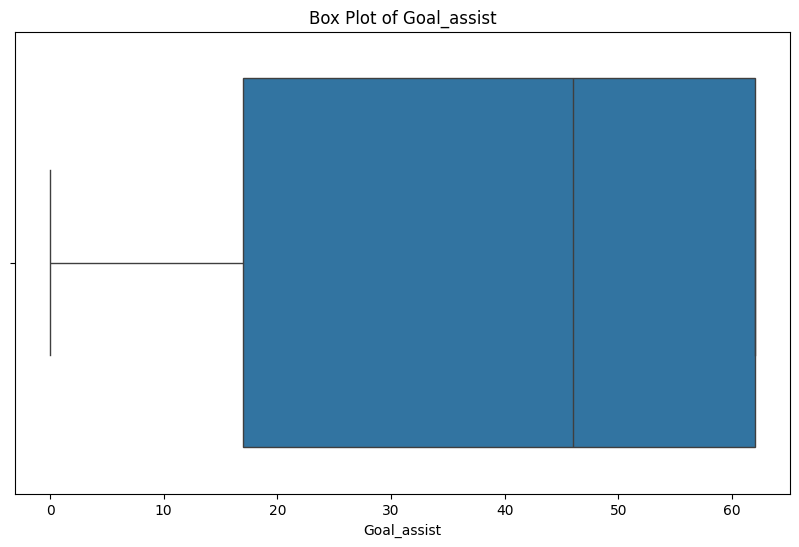

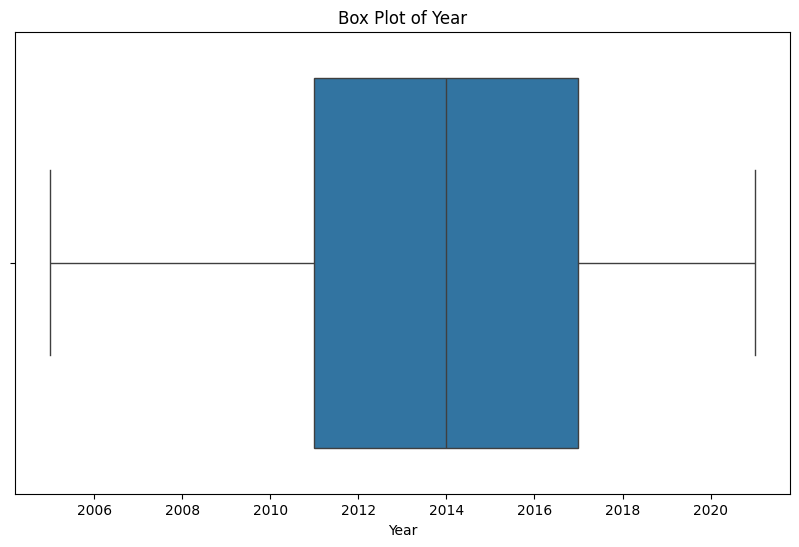

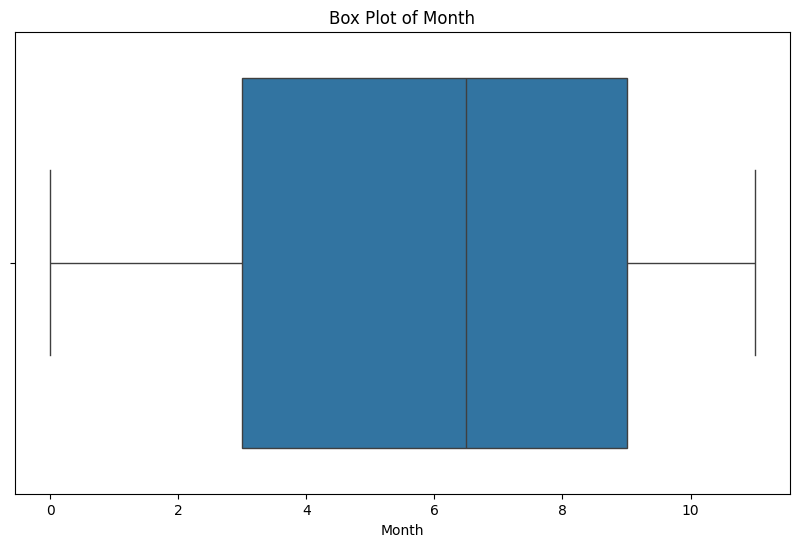

In [6]:
for feature in df_train.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_train[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

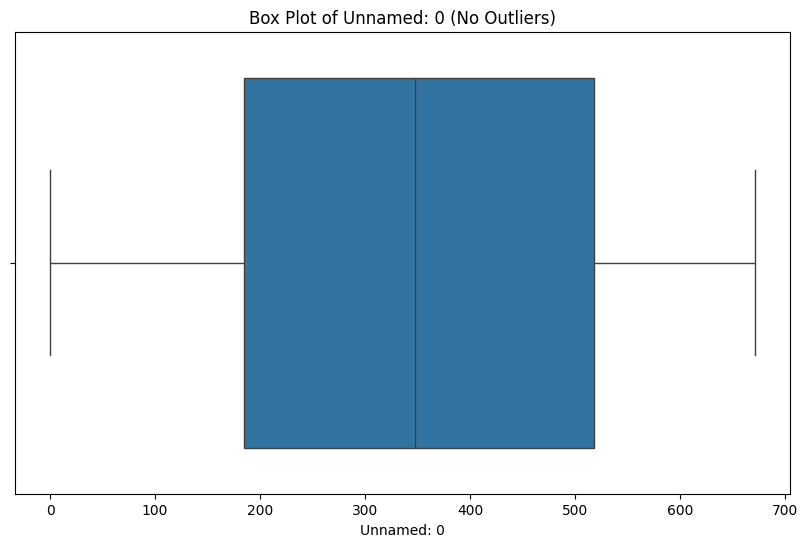

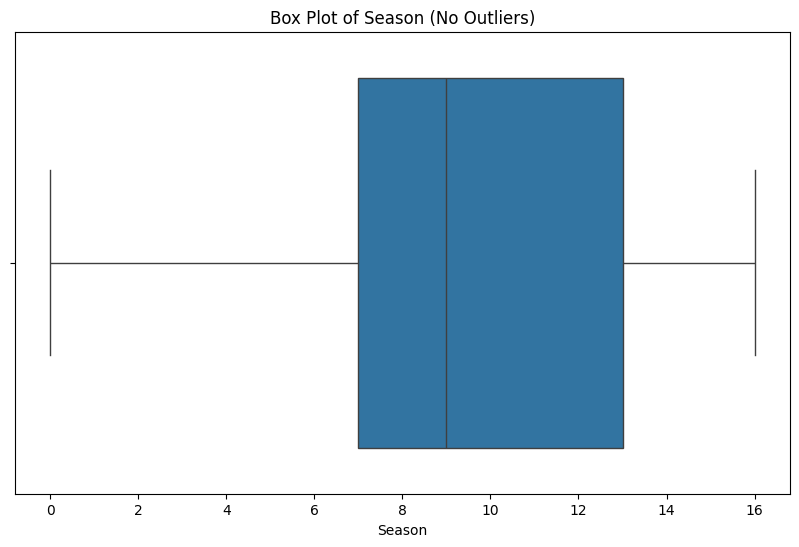

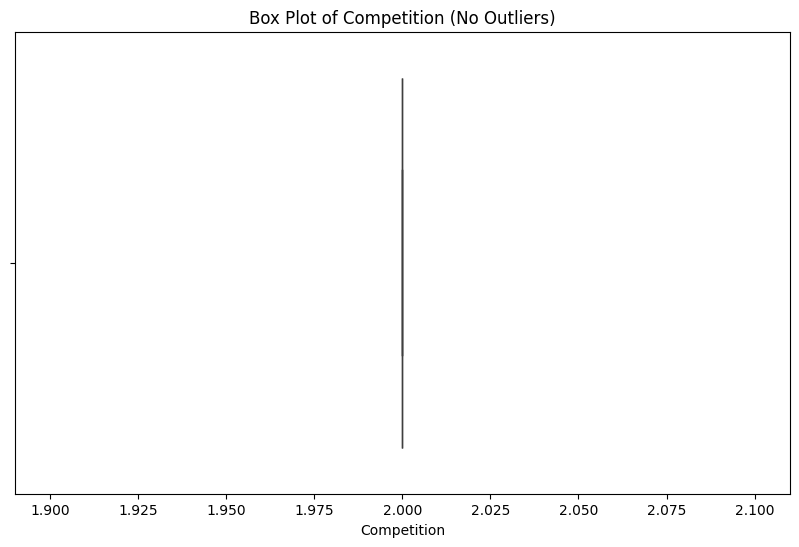

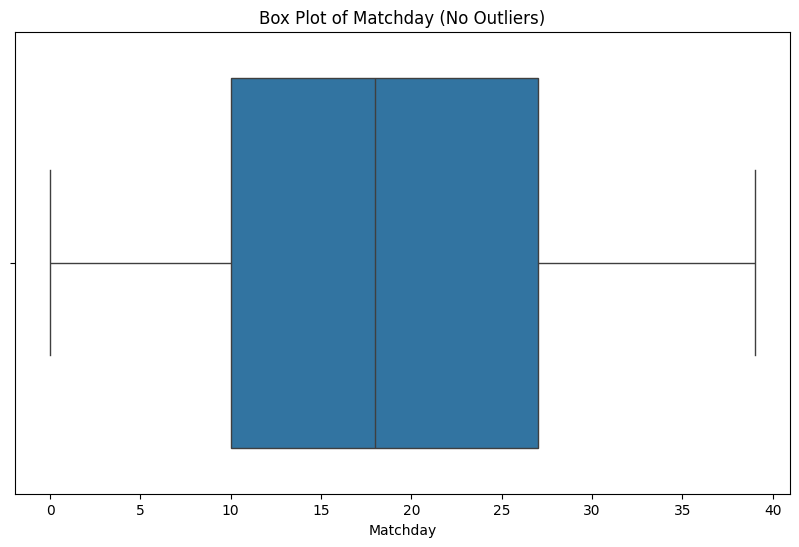

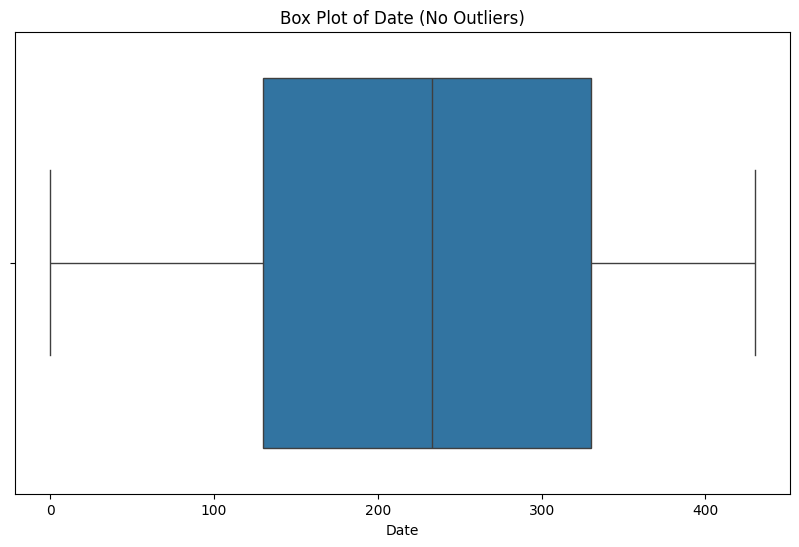

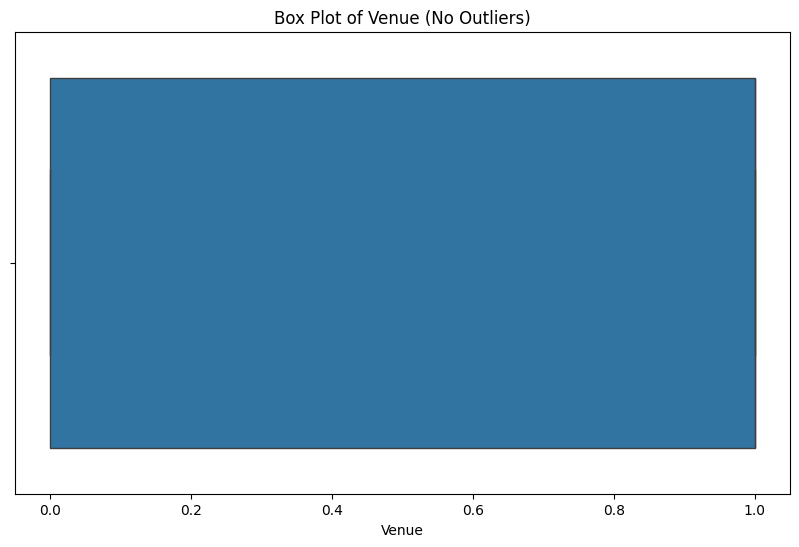

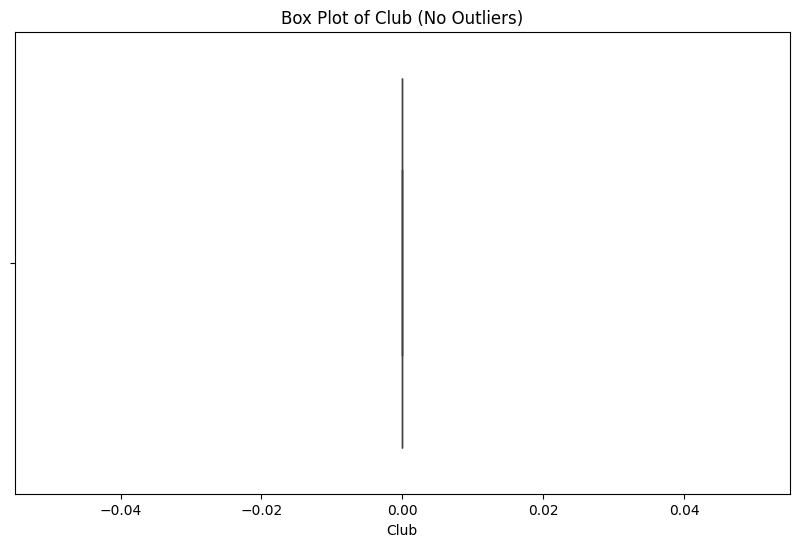

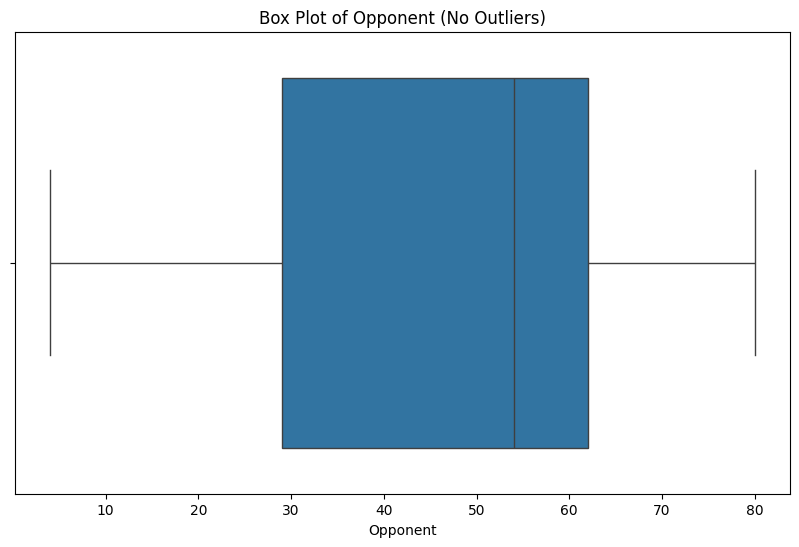

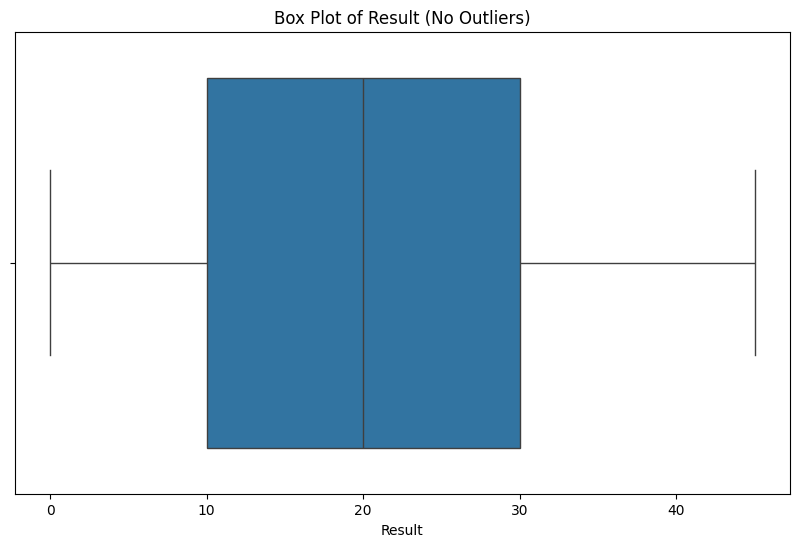

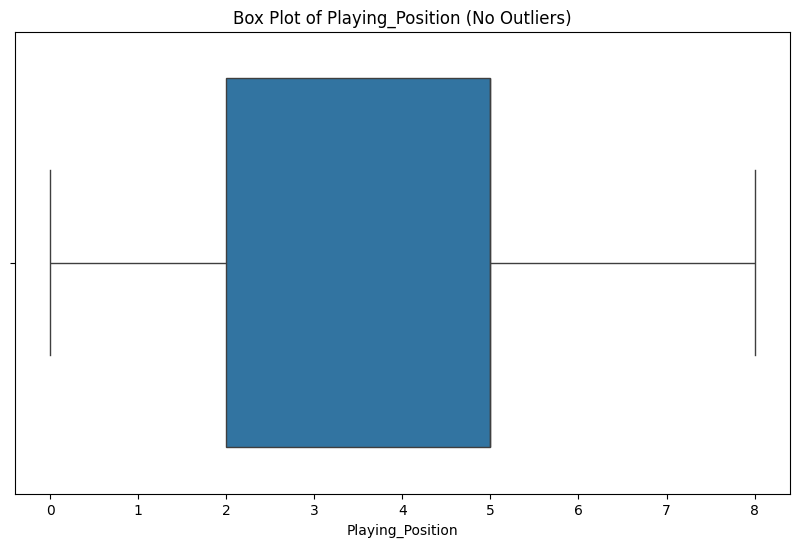

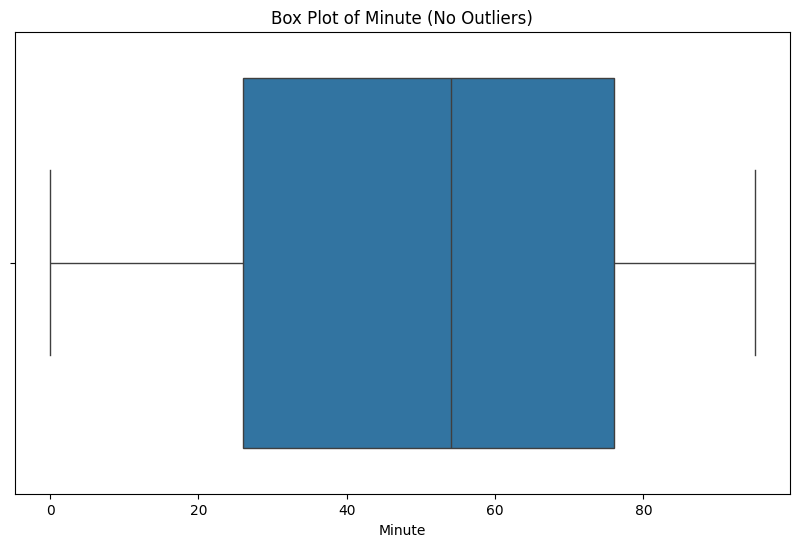

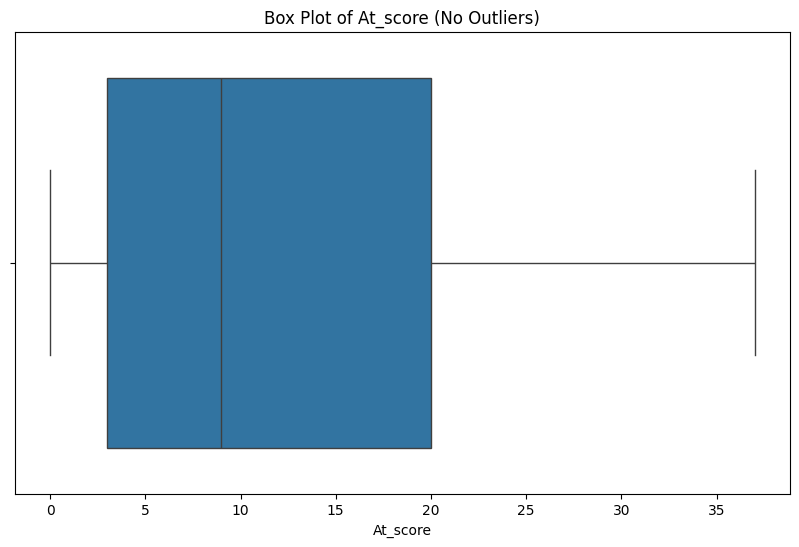

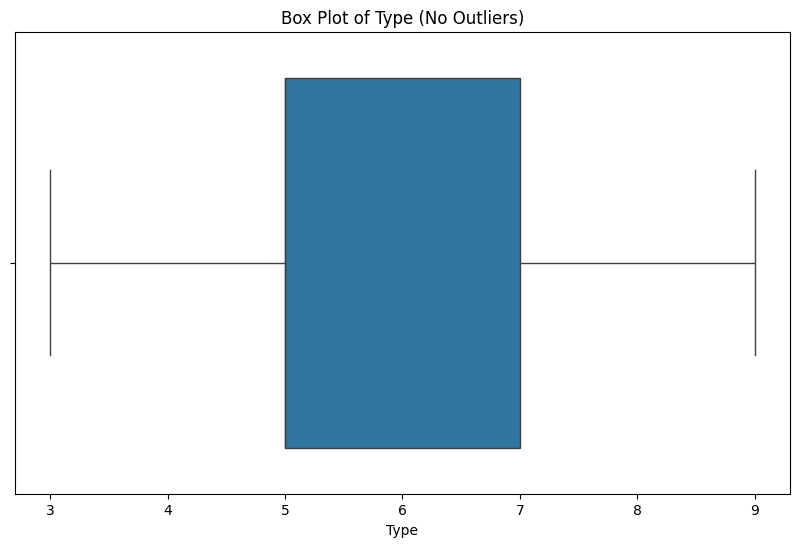

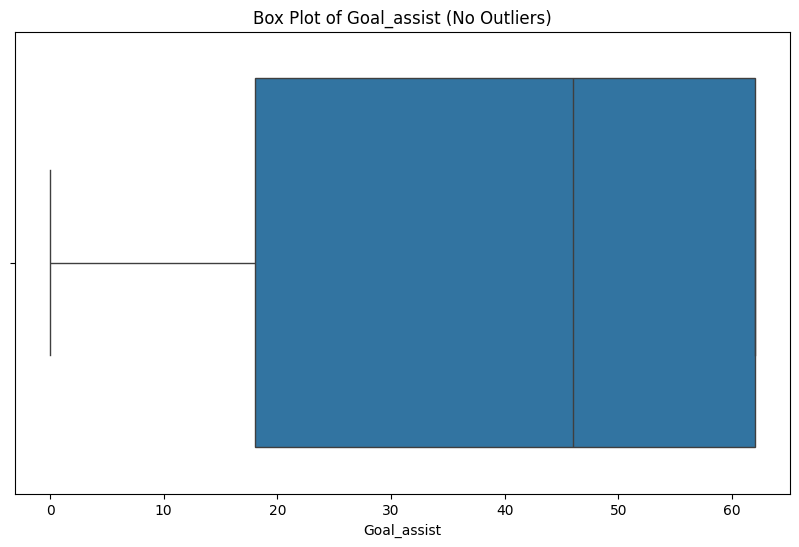

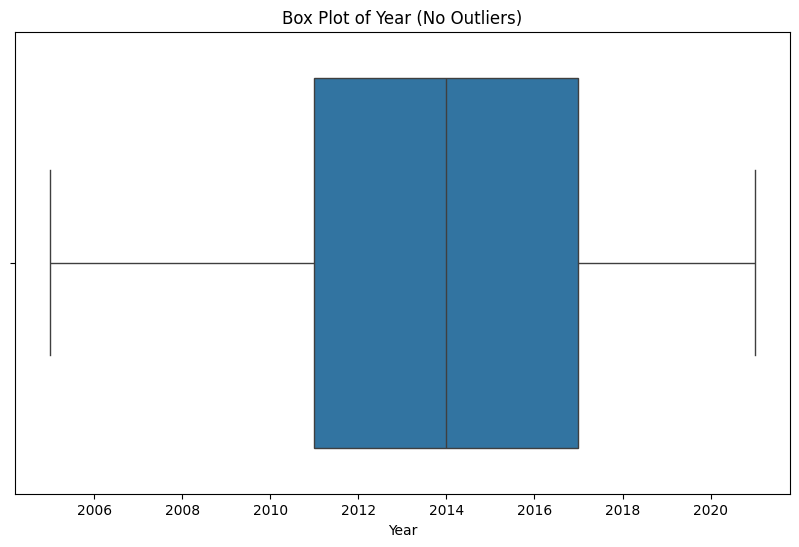

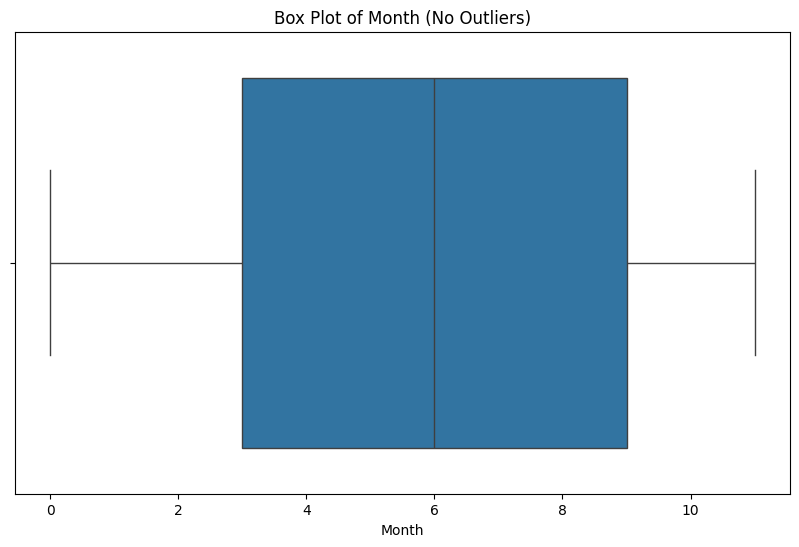

In [7]:
# Hitung batas outlier (IQR)
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1

# Filter baris yang mengandung outlier di salah satu kolom
condition = ~((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).any(axis=1)
df = df_train.loc[condition]  # DataFrame tanpa outlier

# Plot dari DataFrame yang sudah difilter
for feature in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature} (No Outliers)')
    plt.show()

In [8]:
# Memastikan hanya data dengan tipe numerikal yang akan diproses
numeric_features = df.select_dtypes(include=['number']).columns
numeric_features

# Standardisasi fitur numerik
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17912\4273472555.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [9]:
# Mengidentifikasi baris duplikat
duplicates = df.duplicated()

print("Baris duplikat:")
print(df[duplicates])

Baris duplikat:
Empty DataFrame
Columns: [Unnamed: 0, Season, Competition, Matchday, Date, Venue, Club, Opponent, Result, Playing_Position, Minute, At_score, Type, Goal_assist, Year, Month]
Index: []


In [10]:
# exploratory and explanatory data
df.describe(include='all')

,Unnamed: 0,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,Year,Month
count,465.000000,4.650000e+02,465.0,4.650000e+02,4.650000e+02,4.650000e+02,465.0,4.650000e+02,4.650000e+02,4.650000e+02,4.650000e+02,4.650000e+02,4.650000e+02,4.650000e+02,4.650000e+02,4.650000e+02
mean,0.000000,-1.222439e-16,0.0,-1.241540e-16,-8.786281e-17,-7.640244e-17,0.0,2.148819e-17,1.069634e-16,-9.168293e-17,1.260640e-16,-7.258232e-17,-1.528049e-16,3.056098e-17,5.928830e-15,-7.640244e-17
std,1.001077,1.001077e+00,0.0,1.001077e+00,1.001077e+00,1.001077e+00,0.0,1.001077e+00,1.001077e+00,1.001077e+00,1.001077e+00,1.001077e+00,1.001077e+00,1.001077e+00,1.001077e+00,1.001077e+00
min,-1.767683,-2.381071e+00,0.0,-1.707956e+00,-1.852387e+00,-1.176697e+00,0.0,-1.894028e+00,-1.724490e+00,-2.009493e+00,-1.814068e+00,-1.274064e+00,-1.592730e+00,-1.908589e+00,-2.263507e+00,-1.564914e+00
25%,-0.822341,-6.095542e-01,0.0,-7.801526e-01,-7.897366e-01,-1.176697e+00,0.0,-7.825653e-01,-8.937762e-01,-9.987691e-01,-8.837570e-01,-9.541722e-01,-3.490365e-01,-1.051934e+00,-7.588169e-01,-7.207317e-01
50%,0.010583,-1.034065e-01,0.0,-3.791023e-02,5.220963e-02,8.498366e-01,0.0,3.288973e-01,-6.306276e-02,5.173167e-01,1.181164e-01,-3.143884e-01,-3.490365e-01,2.806387e-01,-6.471786e-03,1.234503e-01
75%,0.879276,9.088888e-01,0.0,7.971124e-01,8.451104e-01,8.498366e-01,0.0,6.845653e-01,7.676507e-01,5.173167e-01,9.053027e-01,8.585486e-01,8.946569e-01,1.042109e+00,7.458733e-01,9.676323e-01
max,1.661099,1.668110e+00,0.0,1.910476e+00,1.662534e+00,8.498366e-01,0.0,1.484818e+00,2.013721e+00,2.033403e+00,1.585145e+00,2.671270e+00,2.138350e+00,1.042109e+00,1.749000e+00,1.530420e+00


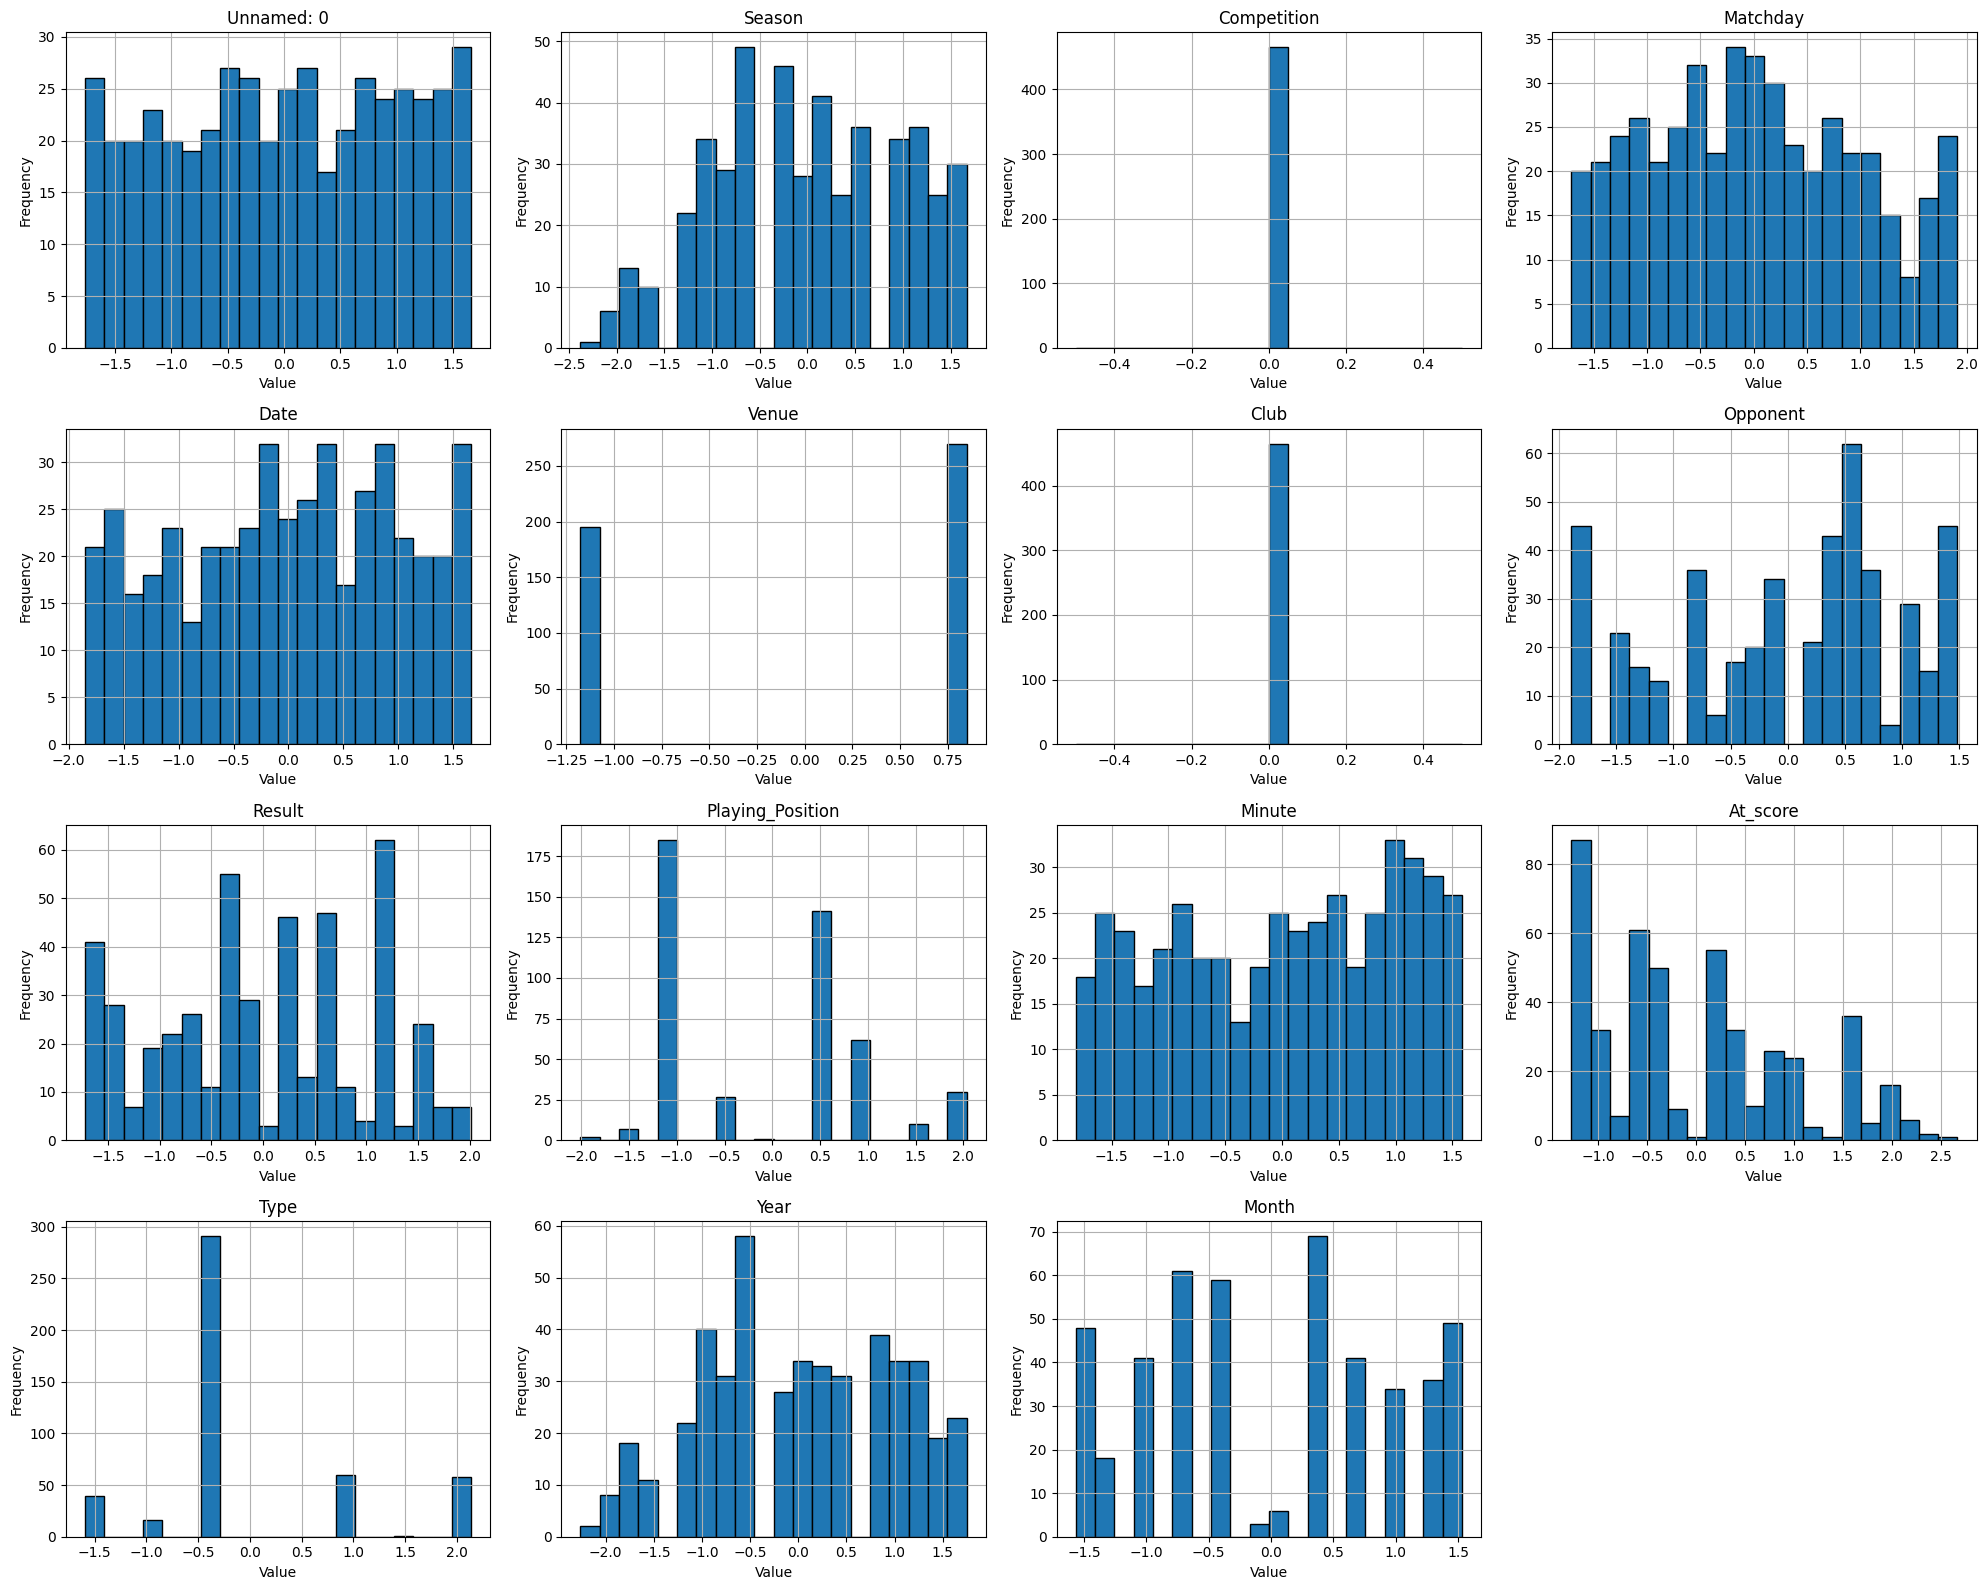

In [11]:
# Menghitung jumlah variabel
num_vars = df.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(df.drop(columns=["Goal_assist"]).columns):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

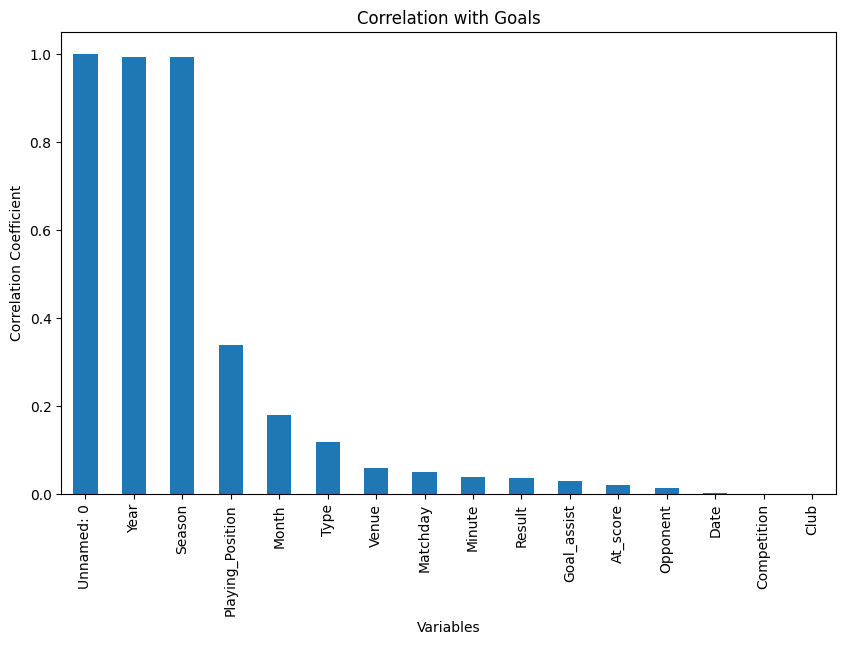

In [12]:
# Menghitung korelasi antara variabel target dan semua variabel lainnya
target_corr = df.corr()['Unnamed: 0']

# (Opsional) Mengurutkan hasil korelasi berdasarkan kekuatan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with Goals')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

# Data Splitting

In [13]:
from sklearn import datasets

# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['Unnamed: 0'])
y = df['Unnamed: 0']

from sklearn.model_selection import train_test_split

# membagi dataset menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# menghitung panjang/jumlah data
print("Jumlah data: ",len(X))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data latih: ",len(x_train))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data test: ",len(x_test))

Jumlah data:  465
Jumlah data latih:  372
Jumlah data test:  93


# Modelling

In [14]:
#LARS
lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)

pred_lars = lars.predict(x_test)

In [15]:
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)

print(f"MAE: {mae_lars}")
print(f"MSE: {mse_lars}")
print(f"R²: {r2_lars}")

MAE: 0.4663633346856272
MSE: 0.29688196146273466
R²: 0.6683109795070483


In [16]:
data = {
    'MAE': [mae_lars],
    'MSE': [mse_lars],
    'R2': [r2_lars]
}

# Konversi dictionary menjadi DataFrame
df_results = pd.DataFrame(data, index=['Lars'])
df_results

,MAE,MSE,R2
Lars,0.466363,0.296882,0.668311


In [17]:
#Linear Regression
LR = LinearRegression().fit(x_train, y_train)

pred_LR = LR.predict(x_test)

mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)

print(f"MAE: {mae_LR}")
print(f"MSE: {mse_LR}")
print(f"R²: {r2_LR}")

MAE: 0.07963100599805273
MSE: 0.011036575121512508
R²: 0.9876694738420109


In [18]:
df_results.loc['Linear Regression'] = [mae_LR, mse_LR, r2_LR]
df_results

,MAE,MSE,R2
Lars,0.466363,0.296882,0.668311
Linear Regression,0.079631,0.011037,0.987669


In [19]:
#Gradient Boosting Regressor
GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(x_train, y_train)

pred_GBR = GBR.predict(x_test)

mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)

print(f"MAE: {mae_GBR}")
print(f"MSE: {mse_GBR}")
print(f"R²: {r2_GBR}")

MAE: 0.013335298933040508
MSE: 0.00030311994698497483
R²: 0.9996613416395798


In [20]:
df_results.loc['GradientBoostingRegressor'] = [mae_GBR, mse_GBR, r2_GBR]
df_results

,MAE,MSE,R2
Lars,0.466363,0.296882,0.668311
Linear Regression,0.079631,0.011037,0.987669
GradientBoostingRegressor,0.013335,0.000303,0.999661


***Analisis Hasil Evaluasi Model***

1. **LARS (Least Angle Regression)**

MAE: 0.466363
MSE: 0.296882
R²: 0.668311

Analisis:
Model LARS memiliki performa yang tergolong rendah dibanding dua model lainnya. Nilai R² sebesar (0.668311) mengindikasikan bahwa model ini hanya mampu menjelaskan sekitar 66.8% variasi dari jumlah gol Messi. Meskipun sederhana, kesalahan rata-ratanya (MAE dan MSE) cukup tinggi, menunjukkan bahwa LARS kurang cocok digunakan untuk prediksi performa gol secara akurat.

2. **Linear Regression**

MAE: 0.079631
MSE: 0.011037
R²: 0.987669

Analisis:
Linear Regression menunjukkan performa yang sangat baik. R² mencapai (0.987669) yang berarti model mampu menjelaskan hampir seluruh variasi data (98.7%). Nilai MAE dan MSE yang rendah menunjukkan bahwa prediksi model ini sangat dekat dengan nilai aktual. Model ini sangat cocok untuk memodelkan hubungan linear antara fitur pertandingan dengan jumlah gol Messi.

3. **Gradient Boosting Regressor (GBR)**

MAE: 0.013335
MSE: 0.000303
R²: 0.999661

Analisis:
Gradient Boosting Regressor adalah model dengan performa paling unggul. Dengan R² sebesar (0.999661), model ini hampir sempurna dalam menjelaskan variasi data. MAE dan MSE sangat kecil, menunjukkan bahwa prediksi hampir identik dengan data aktual. GBR sangat direkomendasikan untuk prediksi performa Messi karena mampu menangkap pola non-linear dan kompleks dengan akurat.

***Kesimpulan:***
- **Gradient Boosting Regressor** adalah model terbaik karena menghasilkan kesalahan prediksi yang sangat kecil dan akurasi prediktif hampir sempurna. Sangat cocok digunakan untuk memprediksi performa Lionel Messi secara kuantitatif berdasarkan data historis.
- **Linear Regression** juga sangat baik dengan hasil mendekati GBR, dan bisa menjadi alternatif ideal untuk model yang lebih sederhana dan interpretable.
- **LARS** menunjukkan performa yang jauh lebih rendah, sehingga tidak direkomendasikan untuk regresi prediktif dalam konteks ini.